(192,)


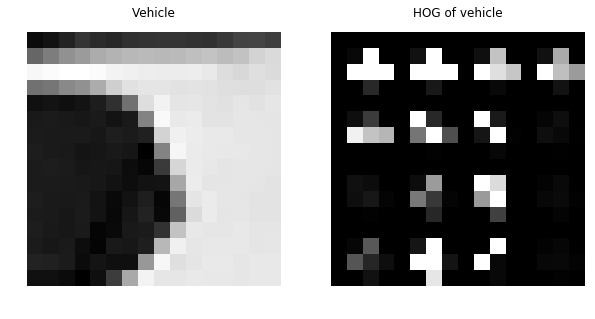

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from skimage.feature import hog
from skimage import data, color, exposure
import cv2
import numpy as np

#img= data.imread('analysis/vehicle1.png')
img= cv2.imread('analysis/vehicle1a.png')
#image = color.rgb2gray(img)
image= cv2.cvtColor(img[2:18,26:42,:], cv2.COLOR_RGB2YCrCb)

fd, hog_image = hog(image[:,:,0], orientations=12, pixels_per_cell=(4, 4),
                    cells_per_block=(1, 1), visualise=True, transform_sqrt=True, feature_vector=True)
print(np.array(fd).shape)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image[:,:,0], cmap='gray', interpolation='none')# plt.cm.gray)
ax1.set_title('Vehicle')
ax1.set_adjustable('box-forced')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 1))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('HOG of vehicle')
ax1.set_adjustable('box-forced')
plt.show()

(192,)


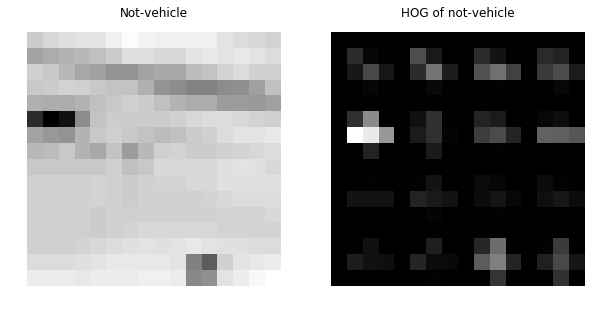

In [2]:
img= cv2.imread('analysis/29-1014-403.PNG')   #11-834-455.PNG
img= cv2.imread('training/non-vehicles/JWD_ncells/1026-1155-575.PNG')
#image = color.rgb2gray(img)
image= cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)

fd, hog_image = hog(image[:,:,0], orientations=12, pixels_per_cell=(4, 4),
                    cells_per_block=(1, 1), visualise=True, transform_sqrt=True, feature_vector=True)
print(np.array(fd).shape)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image[:,:,0], cmap='gray', interpolation='none')# plt.cm.gray)
ax1.set_title('Not-vehicle')
ax1.set_adjustable('box-forced')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 1))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('HOG of not-vehicle')
ax1.set_adjustable('box-forced')
plt.show()

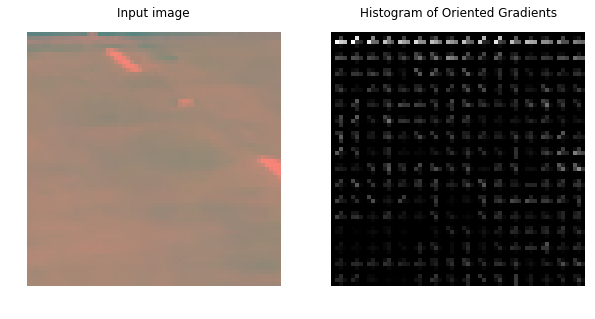

In [32]:
img= mpimg.imread('non-vehicles/Extras/extra5582.png')
#image = color.rgb2gray(img)
image= cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
fd, hog_image = hog(image[:,:,2], orientations=12, pixels_per_cell=(4, 4),
                    cells_per_block=(2, 2), visualise=True, transform_sqrt=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')
ax1.set_adjustable('box-forced')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 0.02))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
ax1.set_adjustable('box-forced')
plt.show()

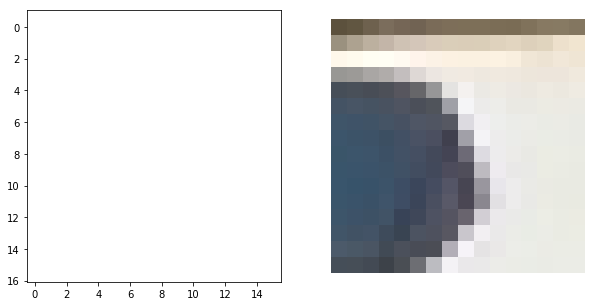

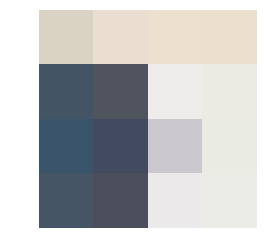

In [7]:
img= cv2.imread('analysis/vehicle1a.png')
image= cv2.cvtColor(img[2:18,26:42,:], cv2.COLOR_RGB2BGR)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), sharex=True, sharey=True)

plt.axis('off')
plt.imshow(image, cmap='gray', interpolation='none')# plt.cm.gray)
plt.show()
plt.axis('off')
plt.imshow(cv2.resize(image,(4,4)), cmap='gray', interpolation='none')# plt.cm.gray)
plt.show()

In [ ]:
# Achieves .995 on 500 samples   [0.9975 on 1000 samples]
colorspace = 'YCrCb' # Can be RGB, HSV, LUV(.99), HLS, YUV, YCrCb(.9975)
orient = 16 #or 12
pix_per_cell = 8
cell_per_block = 2
hog_channel = 'ALL' # Can be 0, 1, 2, or "ALL"


In [52]:
import numpy as np
from sklearn.preprocessing import StandardScaler

car_features= [[1,10],[2,6],[3,5]]   # each element is a vector
notcar_features= [[4,4],[5,3],[6,2],[7,1]]

# vstack the vectors
X= np.vstack((car_features, notcar_features)).astype(np.float64)
# Fit a per-column scaler
X_scaler = StandardScaler().fit(X)
# Apply the scaler to X
scaled_X = X_scaler.transform(X)

# hstack two arrays of ones and zeros (the labels)
y= np.hstack((np.ones(len(car_features)), np.zeros(len(notcar_features))))
print(scaled_X,y)

[[-1.5         2.01127143]
 [-1.          0.56728169]
 [-0.5         0.20628425]
 [ 0.         -0.15471319]
 [ 0.5        -0.51571062]
 [ 1.         -0.87670806]
 [ 1.5        -1.2377055 ]] [ 1.  1.  1.  0.  0.  0.  0.]


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from skimage.feature import hog
from skimage import data, color, exposure
import cv2

img= mpimg.imread('analysis/vehicle1a.png')
#image = color.rgb2gray(img)
image= cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)

fd, hog_image = hog(image[:,:,2], orientations=12, pixels_per_cell=(8, 8),
                    cells_per_block=(2, 2), visualise=True, transform_sqrt=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image[:,:,2], cmap='gray')# plt.cm.gray)
ax1.set_title('Input image')
ax1.set_adjustable('box-forced')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 0.02))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
ax1.set_adjustable('box-forced')
plt.show()

In [47]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
import time
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from skimage.feature import hog
# NOTE: the next import is only valid for scikit-learn version <= 0.17
# for scikit-learn >= 0.18 use:
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split

# Define a function to return HOG features and visualization
def get_hog_features(img, orient, pix_per_cell, cell_per_block, 
                        vis=False, feature_vec=True):
    # Call with two outputs if vis==True
    if vis == True:
        features, hog_image = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block), transform_sqrt=True, 
                                  visualise=vis, feature_vector=feature_vec)
        return features, hog_image
    # Otherwise call with one output
    else:      
        features = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                       cells_per_block=(cell_per_block, cell_per_block), transform_sqrt=True, 
                       visualise=vis, feature_vector=feature_vec)
        return features

# Define a function to extract features from a list of images
# Have this function call bin_spatial() and color_hist()
def extract_features(imgs, cspace='RGB', orient=9, 
                        pix_per_cell=8, cell_per_block=2, hog_channel=0):
    # Create a list to append feature vectors to
    features = []
    # Iterate through the list of images
    for file in imgs:
        # Read in each one by one
        image = mpimg.imread(file)
        # apply color conversion if other than 'RGB'
        if cspace != 'RGB':
            if cspace == 'HSV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
            elif cspace == 'LUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2LUV)
            elif cspace == 'HLS':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
            elif cspace == 'YUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
            elif cspace == 'YCrCb':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)
        else: feature_image = np.copy(image)
        
        #slice the image into quads by column
        quad= []
        quad.append(feature_image[:, 0:32,:])
        quad.append(feature_image[:,32:64,:])

        #quad.append(feature_image[:, 0:21,:])
        #quad.append(feature_image[:,21:42,:])
        #quad.append(feature_image[:,42:63,:]) #drop the last sliver

        #quad.append(feature_image[:, 0:16,:])
        #quad.append(feature_image[:,16:32,:])
        #quad.append(feature_image[:,32:48,:])
        #quad.append(feature_image[:,48:64,:])

        for i in range(2):
            feature_image= quad[i]
            # Call get_hog_features() with vis=False, feature_vec=True
            if hog_channel == 'ALL':
                hog_features = []
                for channel in range(feature_image.shape[2]):
                    hog_features.append(get_hog_features(feature_image[:,:,channel], 
                                        orient, pix_per_cell, cell_per_block, 
                                        vis=False, feature_vec=True))
                    #hog_features.append(feature_image[:,:,channel])
                hog_features = np.ravel(hog_features)        
            else:
                hog_features = get_hog_features(feature_image[:,:,hog_channel], orient, 
                            pix_per_cell, cell_per_block, vis=False, feature_vec=True)
            # Append the new feature vector to the features list
            features.append(hog_features)
    
    # Return list of feature vectors
    return features


# load filenames of images containing vehicles
vimages = glob.glob('training/vehicles/KITTI_extracted/*.png')
cars = []
for image in vimages:
    cars.append(image)

# load filenames of images containing non-vehicles
nimages = glob.glob('training/non-vehicles/Extras/*.png')
notcars = []
for image in nimages:
    notcars.append(image)
nimages = glob.glob('training/non-vehicles/GTI/*.png')
for image in nimages:
    notcars.append(image)

# Reduce the sample size because HOG features are slow to compute
# The quiz evaluator times out after 13s of CPU time
sample_size = 1000
cars = cars[0:sample_size]
notcars = notcars[0:sample_size]


In [49]:
### TODO: Tweak these parameters and see how the results change.
colorspace = 'YCrCb' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 12
pix_per_cell = 8
cell_per_block = 2
hog_channel = 'ALL' # Can be 0, 1, 2, or "ALL"

t=time.time()
car_features = extract_features(cars, cspace=colorspace, orient=orient, 
                        pix_per_cell=pix_per_cell, cell_per_block=cell_per_block, 
                        hog_channel=hog_channel)
notcar_features = extract_features(notcars, cspace=colorspace, orient=orient, 
                        pix_per_cell=pix_per_cell, cell_per_block=cell_per_block, 
                        hog_channel=hog_channel)
t2 = time.time()
print(round(t2-t, 2), 'Seconds to extract HOG features...')

print(np.array(car_features).shape, np.array(notcar_features).shape)
# Create an array stack of feature vectors
X = np.vstack((car_features, notcar_features)).astype(np.float64)                        
# Fit a per-column scaler
X_scaler = StandardScaler().fit(X)
# Apply the scaler to X
scaled_X = X_scaler.transform(X)

# Define the labels vector
y = np.hstack((np.ones(len(car_features)), np.zeros(len(notcar_features))))

# Split up data into randomized training and test sets
rand_state = np.random.randint(0, 100)
X_train, X_test, y_train, y_test = train_test_split(
    scaled_X, y, test_size=0.2, random_state=rand_state)

print('Using:',orient,'orientations',pix_per_cell,
    'pixels per cell and', cell_per_block,'cells per block')
print('Feature vector length:', len(X_train[0]))
# Use a linear SVC 
svc = LinearSVC()
# Check the training time for the SVC
t=time.time()
svc.fit(X_train, y_train)
t2 = time.time()
print(round(t2-t, 2), 'Seconds to train SVC...')
# Check the score of the SVC
print('Test Accuracy of SVC = ', round(svc.score(X_test, y_test), 4))
# Check the prediction time for a single sample
t=time.time()
n_predict = 10
print('   The SVC predicts: ', svc.predict(X_test[0:n_predict]))
print('For these',n_predict, 'labels: ', y_test[0:n_predict])
t2 = time.time()
print(round(t2-t, 5), 'Seconds to predict', n_predict,'labels with SVC')

100.79 Seconds to extract HOG features...
(10000, 3024) (10000, 3024)
Using: 12 orientations 8 pixels per cell and 2 cells per block
Feature vector length: 3024
17.73 Seconds to train SVC...
Test Accuracy of SVC =  0.9955
   The SVC predicts:  [ 1.  1.  1.  1.  0.  0.  1.  0.  1.  1.]
For these 10 labels:  [ 1.  1.  1.  1.  0.  0.  1.  0.  1.  1.]
0.0065 Seconds to predict 10 labels with SVC


In [ ]:
#quads:
52.35 Seconds to extract HOG features...
(12000, 1008) (12000, 1008)
Using: 12 orientations 8 pixels per cell and 2 cells per block
Feature vector length: 1008
5.74 Seconds to train SVC...
Test Accuracy of SVC =  0.9912
   The SVC predicts:  [ 0.  0.  0.  0.  1.  0.  1.  0.  1.  1.]
For these 10 labels:  [ 0.  0.  0.  0.  1.  0.  1.  0.  1.  1.]
0.01562 Seconds to predict 10 labels with SVC

135.75 Seconds to extract HOG features...
(12000, 6480) (12000, 6480)
Using: 12 orientations 4 pixels per cell and 2 cells per block
Feature vector length: 6480
70.5 Seconds to train SVC...
Test Accuracy of SVC =  0.9908
   The SVC predicts:  [ 0.  1.  0.  1.  1.  1.  1.  0.  1.  1.]
For these 10 labels:  [ 0.  1.  0.  1.  1.  1.  1.  0.  1.  1.]
0.0 Seconds to predict 10 labels with SVC

26.83 Seconds to extract HOG features...
(2000, 4320) (2000, 4320)
Using: 8 orientations 4 pixels per cell and 2 cells per block
Feature vector length: 4320
17.82 Seconds to train SVC...
Test Accuracy of SVC =  0.9888
   The SVC predicts:  [ 1.  1.  0.  1.  0.  1.  0.  1.  1.  1.]
For these 10 labels:  [ 1.  1.  0.  1.  0.  1.  0.  1.  1.  1.]
0.0 Seconds to predict 10 labels with SVC

#triple
21.61 Seconds to extract HOG features...
(1500, 5760) (1500, 5760)
Using: 8 orientations 4 pixels per cell and 2 cells per block
Feature vector length: 5760
1.44 Seconds to train SVC...
Test Accuracy of SVC =  0.98
   The SVC predicts:  [ 0.  0.  1.  0.  1.  0.  0.  0.  0.  1.]
For these 10 labels:  [ 0.  0.  1.  0.  1.  1.  0.  0.  0.  1.]
0.005 Seconds to predict 10 labels with SVC

9.78 Seconds to extract HOG features...
(1500, 2304) (1500, 2304)
Using: 12 orientations 7 pixels per cell and 2 cells per block
Feature vector length: 2304
0.5 Seconds to train SVC...
Test Accuracy of SVC =  0.985
   The SVC predicts:  [ 1.  1.  0.  0.  0.  1.  1.  1.  1.  1.]
For these 10 labels:  [ 1.  1.  0.  0.  0.  1.  1.  1.  1.  1.]
0.0 Seconds to predict 10 labels with SVC

#half
9.01 Seconds to extract HOG features...
(1000, 3024) (1000, 3024)
Using: 12 orientations 8 pixels per cell and 2 cells per block
Feature vector length: 3024
4.85 Seconds to train SVC...
Test Accuracy of SVC =  0.985
   The SVC predicts:  [ 1.  0.  0.  0.  0.  0.  0.  0.  1.  1.]
For these 10 labels:  [ 1.  0.  0.  0.  0.  0.  0.  0.  1.  1.]
0.0 Seconds to predict 10 labels with SVC

#nonHOG classifier
Feature vector length: 6144
Test Accuracy of SVC =  0.868
   The SVC predicts:  [ 1.  0.  0.  1.  1.  0.  0.  0.  0.  0.]
For these 10 labels:  [ 1.  0.  1.  1.  1.  1.  1.  0.  0.  0.]
0.006 Seconds to predict 10 labels with SVC

In [48]:
### TODO: Tweak these parameters and see how the results change.
colorspace = 'YCrCb' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 12
pix_per_cell = 8
cell_per_block = 2
hog_channel = 'ALL' # Can be 0, 1, 2, or "ALL"

t=time.time()
car_features = extract_features(cars, cspace=colorspace, orient=orient, 
                        pix_per_cell=pix_per_cell, cell_per_block=cell_per_block, 
                        hog_channel=hog_channel)
notcar_features = extract_features(notcars, cspace=colorspace, orient=orient, 
                        pix_per_cell=pix_per_cell, cell_per_block=cell_per_block, 
                        hog_channel=hog_channel)
t2 = time.time()
print(round(t2-t, 2), 'Seconds to extract HOG features...')

print(np.array(car_features).shape, np.array(notcar_features).shape)
# Create an array stack of feature vectors
X = np.vstack((car_features, notcar_features)).astype(np.float64)                        
# Fit a per-column scaler
X_scaler = StandardScaler().fit(X)
# Apply the scaler to X
scaled_X = X_scaler.transform(X)

# Define the labels vector
y = np.hstack((np.ones(len(car_features)), np.zeros(len(notcar_features))))

# Split up data into randomized training and test sets
rand_state = np.random.randint(0, 100)
X_train, X_test, y_train, y_test = train_test_split(
    scaled_X, y, test_size=0.2, random_state=rand_state)

print('Using:',orient,'orientations',pix_per_cell,
    'pixels per cell and', cell_per_block,'cells per block')
print('Feature vector length:', len(X_train[0]))

#####################################################################################################################
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential([
    Dense(512, input_dim=len(X_train[0]), init='normal', activation='relu'),
    Dense(1, init='normal', activation='sigmoid')
])

# binary classification
model.compile(optimizer='adam',  #rmsprop
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

# Check the training time for the model
t=time.time()
model.fit(X_train, y_train, nb_epoch=5, batch_size=32, verbose=2)
t2 = time.time()

print(round(t2-t, 2), 'Seconds to train SVC...')
# Check the score of the SVC
print('Test Accuracy of SVC = ', round(model.evaluate(X_test, y_test, batch_size=16)[1], 4))


92.0 Seconds to extract HOG features...
(10000, 3024) (10000, 3024)
Using: 12 orientations 8 pixels per cell and 2 cells per block
Feature vector length: 3024
____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_17 (Dense)                 (None, 512)           1548800     dense_input_9[0][0]              
____________________________________________________________________________________________________
dense_18 (Dense)                 (None, 1)             513         dense_17[0][0]                   
Total params: 1,549,313
Trainable params: 1,549,313
Non-trainable params: 0
____________________________________________________________________________________________________
Epoch 1/5
4s - loss: 0.0390 - acc: 0.9886
Epoch 2/5
4s - loss: 0.0080 - acc: 0.9974
Epoch 3/5
4s - loss: 0.0025 - acc: 0.9993
Epoch 4/5
4s - loss: 0.0074 - acc

In [ ]:
#trained keras model
92.0 Seconds to extract HOG features...
(10000, 3024) (10000, 3024)
Using: 12 orientations 8 pixels per cell and 2 cells per block
Feature vector length: 3024
____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
====================================================================================================
dense_17 (Dense)                 (None, 512)           1548800     dense_input_9[0][0]              
____________________________________________________________________________________________________
dense_18 (Dense)                 (None, 1)             513         dense_17[0][0]                   
====================================================================================================
Total params: 1,549,313
Trainable params: 1,549,313
Non-trainable params: 0
____________________________________________________________________________________________________
Epoch 1/5
4s - loss: 0.0390 - acc: 0.9886
Epoch 2/5
4s - loss: 0.0080 - acc: 0.9974
Epoch 3/5
4s - loss: 0.0025 - acc: 0.9993
Epoch 4/5
4s - loss: 0.0074 - acc: 0.9980
Epoch 5/5
4s - loss: 0.0036 - acc: 0.9990
22.46 Seconds to train SVC...
4000/4000 [==============================] - 1s 
Test Accuracy of SVC =  0.9965

#compared to sklearn
100.79 Seconds to extract HOG features...
(10000, 3024) (10000, 3024)
Using: 12 orientations 8 pixels per cell and 2 cells per block
Feature vector length: 3024
17.73 Seconds to train SVC...
Test Accuracy of SVC =  0.9955
   The SVC predicts:  [ 1.  1.  1.  1.  0.  0.  1.  0.  1.  1.]
For these 10 labels:  [ 1.  1.  1.  1.  0.  0.  1.  0.  1.  1.]
0.0065 Seconds to predict 10 labels with SVC

# 16-way version

In [4]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
import time
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from skimage.feature import hog
# NOTE: the next import is only valid for scikit-learn version <= 0.17
# for scikit-learn >= 0.18 use:
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split

# Define a function to return HOG features and visualization
def get_hog_features(img, orient, pix_per_cell, cell_per_block, 
                        vis=False, feature_vec=True):
    # Call with two outputs if vis==True
    if vis == True:
        features, hog_image = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block), transform_sqrt=True, 
                                  visualise=vis, feature_vector=feature_vec)
        return features, hog_image
    # Otherwise call with one output
    else:      
        features = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                       cells_per_block=(cell_per_block, cell_per_block), transform_sqrt=True, 
                       visualise=vis, feature_vector=feature_vec)
        return features

# Define a function to extract features from a list of images
# Have this function call bin_spatial() and color_hist()
def extract_features(imgs, cspace='RGB', orient=9, 
                        pix_per_cell=8, cell_per_block=2, hog_channel=0):
    # Create a list to append feature vectors to
    features = []
    # Iterate through the list of images
    for file in imgs:
        # Read in each one by one
        image = mpimg.imread(file)
        # apply color conversion if other than 'RGB'
        if cspace != 'RGB':
            if cspace == 'HSV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
            elif cspace == 'LUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2LUV)
            elif cspace == 'HLS':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
            elif cspace == 'YUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
            elif cspace == 'YCrCb':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)
        else: feature_image = np.copy(image)
        
        #first, slice the image into quads by column
        quad= []
        quad.append(feature_image[:, 0:16,:])
        quad.append(feature_image[:,16:32,:])
        quad.append(feature_image[:,32:48,:])
        quad.append(feature_image[:,48:64,:])
        for i in range(4):
            #next, slice the quad into squares by row
            square= []
            square.append(quad[i][ 0:16,:,:])
            square.append(quad[i][16:32,:,:])
            square.append(quad[i][32:48,:,:])
            square.append(quad[i][48:64,:,:])
            for j in range(4):
                feature_image= square[j]
                # Call get_hog_features() with vis=False, feature_vec=True
                if hog_channel == 'ALL':
                    hog_features = []
                    for channel in range(feature_image.shape[2]):
                        hog_features.append(get_hog_features(feature_image[:,:,channel], 
                                            orient, pix_per_cell, cell_per_block, 
                                            vis=False, feature_vec=True))
                        #hog_features.append(feature_image[:,:,channel])
                    hog_features = np.ravel(hog_features)        
                else:
                    hog_features = get_hog_features(feature_image[:,:,hog_channel], orient, 
                                pix_per_cell, cell_per_block, vis=False, feature_vec=True)
                # Append the new feature vector to the features list
                features.append(hog_features)
    del quad, square
    # Return list of feature vectors
    return features

# load filenames of images containing vehicles   glob.glob('training/vehicles/KITTI_extracted/*.png')
vimages = glob.glob('training/vehicles/GTI_Right/*.png')
cars = []
for image in vimages:
    cars.append(image)
vimages = glob.glob('training/vehicles/GTI_Left/*.png')
for image in vimages:
    cars.append(image)
vimages = glob.glob('training/vehicles/GTI_MiddleClose/*.png')
for image in vimages:
    cars.append(image)

# load filenames of images containing non-vehicles
nimages = glob.glob('training/non-vehicles/Extras/*.png')
notcars = []
for image in nimages:
    notcars.append(image)
nimages = glob.glob('training/non-vehicles/GTI/*.png')
for image in nimages:
    notcars.append(image)

del vimages, nimages
# Reduce the sample size because HOG features are slow to compute
# The quiz evaluator times out after 13s of CPU time
sample_size = 1000
cars = cars[0:sample_size]
notcars = notcars[0:sample_size]


In [5]:
### TODO: Tweak these parameters and see how the results change.
colorspace = 'YCrCb' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 8
pix_per_cell = 4
cell_per_block = 2
hog_channel = 'ALL' # Can be 0, 1, 2, or "ALL"

t=time.time()
print('Extracting cars...')
car_features = extract_features(cars, cspace=colorspace, orient=orient, 
                        pix_per_cell=pix_per_cell, cell_per_block=cell_per_block, 
                        hog_channel=hog_channel)
print('Extracting notcars...')
notcar_features = extract_features(notcars, cspace=colorspace, orient=orient, 
                        pix_per_cell=pix_per_cell, cell_per_block=cell_per_block, 
                        hog_channel=hog_channel)
t2 = time.time()
print(round(t2-t, 2), 'Seconds to extract HOG features...')

print(np.array(car_features).shape, np.array(notcar_features).shape)
# Create an array stack of feature vectors
X = np.vstack((car_features, notcar_features)).astype(np.float64)                        
# Fit a per-column scaler
X_scaler = StandardScaler().fit(X)
# Apply the scaler to X
scaled_X = X_scaler.transform(X)

# Define the labels vector
y = np.hstack((np.ones(len(car_features)), np.zeros(len(notcar_features))))

# Split up data into randomized training and test sets
rand_state = np.random.randint(0, 100)
X_train, X_test, y_train, y_test = train_test_split(
    scaled_X, y, test_size=0.1, random_state=rand_state)

del scaled_X, y, cars, notcars
del car_features, notcar_features
print('Using:',orient,'orientations',pix_per_cell,
    'pixels per cell and', cell_per_block,'cells per block')
print('Feature vector length:', len(X_train[0]))

Extracting cars...
Extracting notcars...
53.33 Seconds to extract HOG features...
(16000, 864) (16000, 864)
Using: 8 orientations 4 pixels per cell and 2 cells per block
Feature vector length: 864


In [6]:
#####################################################################################################################
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

model= Sequential([
    Dense(512, input_dim=len(X_train[0]), init='normal', activation='relu'),
    Dropout(.15),
    Dense(1, init='normal', activation='sigmoid')
])

# binary classification
model.compile(optimizer='adam',  #rmsprop
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Using TensorFlow backend.


____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_1 (Dense)                  (None, 512)           442880      dense_input_1[0][0]              
____________________________________________________________________________________________________
dropout_1 (Dropout)              (None, 512)           0           dense_1[0][0]                    
____________________________________________________________________________________________________
dense_2 (Dense)                  (None, 1)             513         dropout_1[0][0]                  
Total params: 443,393
Trainable params: 443,393
Non-trainable params: 0
____________________________________________________________________________________________________


In [7]:
# Check the training time for the model
t=time.time()
model.fit(X_train, y_train, nb_epoch=7, batch_size=32, verbose=2)
t2 = time.time()

print(round(t2-t, 2), 'Seconds to train SVC...')
# Check the score of the SVC
print('Test Accuracy of SVC = ', round(model.evaluate(X_test, y_test, batch_size=16)[1], 4))


Epoch 1/7
8s - loss: 0.1693 - acc: 0.9378
Epoch 2/7
6s - loss: 0.0647 - acc: 0.9783
Epoch 3/7
6s - loss: 0.0359 - acc: 0.9885
Epoch 4/7
6s - loss: 0.0268 - acc: 0.9911
Epoch 5/7
6s - loss: 0.0291 - acc: 0.9907
Epoch 6/7
6s - loss: 0.0298 - acc: 0.9909
Epoch 7/7
6s - loss: 0.0167 - acc: 0.9947
49.2 Seconds to train SVC...
3200/3200 [==============================] - 0s     

In [8]:
# Check the training time for the model
t=time.time()
model.fit(X_train, y_train, nb_epoch=7, batch_size=32, verbose=2)
t2 = time.time()

print(round(t2-t, 2), 'Seconds to train SVC...')
# Check the score of the SVC
print('Test Accuracy of SVC = ', round(model.evaluate(X_test, y_test, batch_size=16)[1], 4))


Epoch 1/7
6s - loss: 0.0202 - acc: 0.9938
Epoch 2/7
6s - loss: 0.0150 - acc: 0.9955
Epoch 3/7
6s - loss: 0.0182 - acc: 0.9948
Epoch 4/7
6s - loss: 0.0195 - acc: 0.9940
Epoch 5/7
6s - loss: 0.0155 - acc: 0.9955
Epoch 6/7
6s - loss: 0.0203 - acc: 0.9947
Epoch 7/7
6s - loss: 0.0120 - acc: 0.9967
45.77 Seconds to train SVC...
3152/3200 [============================>.] - ETA: 0s

In [9]:

del X_train, X_test, y_train, y_test
del model

Rotated images matched against references using LBP:
original: brick, rotated: 30deg, match result:
brick
original: brick, rotated: 70deg, match result:
brick
original: grass, rotated: 145deg, match result:
grass
original: wall, rotated: 40deg, match result:
wall


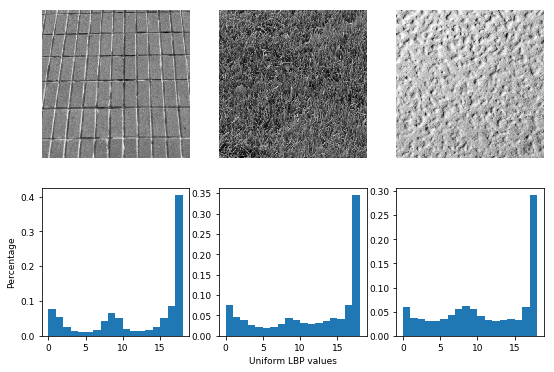

In [9]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.ndimage as nd
import skimage.feature as ft
from skimage import data


# settings for LBP
METHOD = 'uniform'
P = 16
R = 2
matplotlib.rcParams['font.size'] = 9


def kullback_leibler_divergence(p, q):
    p = np.asarray(p)
    q = np.asarray(q)
    filt = np.logical_and(p != 0, q != 0)
    return np.sum(p[filt] * np.log2(p[filt] / q[filt]))


def match(refs, img):
    best_score = 10
    best_name = None
    lbp = ft.local_binary_pattern(img, P, R, METHOD)
    hist, _ = np.histogram(lbp, normed=True, bins=P + 2, range=(0, P + 2))
    for name, ref in refs.items():
        ref_hist, _ = np.histogram(ref, normed=True, bins=P + 2,
                                   range=(0, P + 2))
        score = kullback_leibler_divergence(hist, ref_hist)
        if score < best_score:
            best_score = score
            best_name = name
    return best_name


brick = data.load('brick.png')
grass = data.load('grass.png')
wall = data.load('rough-wall.png')

refs = {
    'brick': ft.local_binary_pattern(brick, P, R, METHOD),
    'grass': ft.local_binary_pattern(grass, P, R, METHOD),
    'wall': ft.local_binary_pattern(wall, P, R, METHOD)
}

# classify rotated textures
print ('Rotated images matched against references using LBP:')
print ('original: brick, rotated: 30deg, match result:',)
print (match(refs, nd.rotate(brick, angle=30, reshape=False)))
print ('original: brick, rotated: 70deg, match result:',)
print (match(refs, nd.rotate(brick, angle=70, reshape=False)))
print ('original: grass, rotated: 145deg, match result:',)
print (match(refs, nd.rotate(grass, angle=145, reshape=False)))
print ('original: wall, rotated: 40deg, match result:',)
print (match(refs, nd.rotate(wall, angle=40, reshape=False)))

# plot histograms of LBP of textures
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3,
                                                       figsize=(9, 6))
plt.gray()

ax1.imshow(brick)
ax1.axis('off')
ax4.hist(refs['brick'].ravel(), normed=True, bins=P + 2, range=(0, P + 2))
ax4.set_ylabel('Percentage')

ax2.imshow(grass)
ax2.axis('off')
ax5.hist(refs['grass'].ravel(), normed=True, bins=P + 2, range=(0, P + 2))
ax5.set_xlabel('Uniform LBP values')

ax3.imshow(wall)
ax3.axis('off')
ax6.hist(refs['wall'].ravel(), normed=True, bins=P + 2, range=(0, P + 2))

plt.show()